In [1]:
import numpy as np
import pandas as pan
import math as mt
import random
import matplotlib.pyplot as plt
import matplotlib as mat
import PIL
from PIL import Image
import pickle
import networkx as nx
from datetime import datetime
import time

# Network

In [2]:
class kohonenNetwork:
    def __init__(self,neuronsCount, learningRate, weights):
        self.constWeights=weights
        self.weights=weights
        self.neuronsCount=neuronsCount
        self.neurons=np.zeros(self.neuronsCount)
        self.neurons=weights
        self.learningRate=learningRate
        
    def createWeight(self, shape):
        self.neurons=np.array([random.uniform(0,1) for i in range(15360)]).reshape(shape)
        
    def distance(self,neuron, obj):
        #print(type(float(np.sqrt(np.sum( (neuron-obj)**2)))))
        result = np.sqrt(np.sum( (neuron-obj)**2) ) 
        return result
        
    def train(self,data, epoch=10):#переделать потом на numpy        
        for epo in range(epoch):
            for i in range(len(data)):
                number=0
                mymin=100000
                for neuron in self.neurons:
                    dist=self.distance(neuron, data[i] )
                    if(mymin>dist):
                        mymin=dist
                        number = neuron
                number = number + self.learningRate*data[i]
            np.random.shuffle(data)
        #print('Good')
        
    def retrain(self,data,epoch=10):
        #self.createWeight(self.constWeights.shape) #######
        self.createWeight(self.constWeights.shape)
        self.train(data=data,epoch=epoch)
        
    def cluster(self,obj): #переделать под numpy
        mymin=10000
        clust = 0
        itr=0
        for i in self.neurons:
            if(mymin>self.distance(i,obj)):
                mymin = self.distance(i,obj)
                clust = itr
            itr = itr + 1
        return clust
    
    def load(self,path): #сохранение весов сети
        self.neurons=np.load(path) #загрузка весов сети 
        
    def save(self,path):
        np.save(path, self.neurons)     
        
    def createClusterNumberSet(self, images): #Кластеризация нескольких изображений(возвращает массив из номеров класетров)
        listofnumber=[]
        for i in images:
            listofnumber.append(self.cluster(i))
        return listofnumber
    
    def createSetOfImages(self, images, clusternumbers):#Возвращает список кластеризованных изображений то есть список кластеров с картинками 
        #print("Creating...")
        j=0
        imagesSet=[[] for i in range(self.neuronsCount)]################### add: np.array()
        for i in images:
            number = clusternumbers[j]
            #imagesSet[number]=np.vstack((imagesSet[number],i))
            imagesSet[number].append(i)
            j+=1
        #print("Good")
            #print(len(imagesSet[i]))
        res = []
        for i in range(self.neuronsCount):
            #if(len(imagesSet[i])>0):
            res.append(imagesSet[i])
        
        return res #np.asarray(imagesSet)
    
    def createSetOfNumbers(self, images, clusternumbers):# возвращает список с кластерами номеров соответствующих им изображений
        #print("Creating...")
        j=0
        numberSet=[[] for i in range(self.neuronsCount)]
        for i in range(len(images)):
            number = clusternumbers[j]
            numberSet[number].append(i)
            j+=1
        #print("Good")
        return numberSet
            
 

# Functions

In [3]:
#MyFunctions
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    #+ '/data_batch_'
    with open(cifar10_dataset_folder_path + '/'+ str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    #labels = batch['labels']      
    #return features, labels
    return features

def isSimpleStruct(obj):# определить является ли структура просто массивом картинок
    #print(obj)
    #print(type(obj[0]))
    if(type(obj[0]) == list): return False
    if(type(obj[0]) == np.ndarray): return True
    #if(len(obj.shape) == 4):
     #   if(obj.shape[1] == 32 and obj.shape[2] == 32 and obj.shape[3] == 3):
      #      return True
        
    return False


def findMean(data):
    some=np.zeros((32,32,3))
    for image in data:
        some=some+image
    some=some//data.shape[0]
    return some
    
#Main Algorithm############################################################################################################
def method(data, network, numbers):
    #print('Начало:') 
    tempNumbers=numbers
    #print(data.shape)
    if(isSimpleStruct(data)):
        if(len(data) > 5):
            #print('Набор картинок:')
            weights = np.array([random.uniform(0,1) for i in range(15360)]).reshape(5,32,32,3)#убарть на ReTrain
            network = kohonenNetwork(5,0.1, weights)  ##Network.Retrain
            network.train(data, 5)######################
            ##network.retrain(data)
            
            network.save(')
            
            #for i in data:
                #if(np.array_equal(i,features[0])):
                    #print(tempNumbers,'тут')
                    #print(network.neurons[0][0])
                    #print(network.cluster(features[0]))
            dataNumbers=network.createClusterNumberSet(data)
            data = network.createSetOfImages(data , dataNumbers)
            
            data = method(data, network, tempNumbers)
            
    else:
        
        for (mas) in range(len(data)):
            
            
                #if(np.array_equal(i,features[0])):
                    #print(mas,'тут внутри массива')
            if(data[mas] == []): continue
                
            data[mas] = method(data[mas],network,(tempNumbers + "," + str(mas)))

    return data
#VIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIISSSSSSSSSSSSSSSSUUUUUUUUUUUUUUUUUUUUAAAAAAAAAAAAAALLLLLLLLL
def visual(data, gr, st, MYMY):#уб
    if(data == []):
        gr.add_node('пус'+st)
        return 'пус'+st
    if(type(data[0])==np.ndarray):
        gr.add_node(st+' К:' + str(len(data)))
        for i in data:#уб
            if(np.array_equal(i, MYMY)):#уб
                print(st + ' тут') #уб
                
                
        return st+' К:' + str(len(data))
    else:
        gr.add_node(st)
        for i in range(len(data)):
            gr.add_edge(st, visual(data[i],gr,st +','+str(i), MYMY))#уб MYMY
        return st
#Coooooooooooooooooooooooooollllllllllllllllllllllooooooooooooooooooooorrrrrrrrrrrrrrrrrrrrrrrrrssssssssssssssssssssssss
def colo(gr):
    colors=[]
    count = 0
    for node in gr:
        if node.find('К') != -1: 
            colors.append('blue')
            ch=int(node[node.find('К')+2:])
            count = count + ch 
        else: colors.append('y')
    print(count)
    return colors

# Start of Algoritm try

In [4]:
cifar10_dataset_folder_path=''
batch_id = 'train'#3
sample_id = 7000
#features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
prefeatures = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
features = prefeatures[:1000]
features = features / 255 #АААААААААААААААААААААААААААААА

In [5]:
weights = np.array([random.uniform(0,1) for i in range(15360)]).reshape(5,32,32,3)
epoch=10
network = kohonenNetwork(5,0.1, weights)

In [6]:
start_time = datetime.now()
newdata=method(features,network=network,numbers='0')
print(datetime.now() - start_time)

0:00:05.908875


In [ ]:
#Визуаализация плюс алгоритм поиска простым обходом(перебор)
fig = plt.gcf()
fig.set_size_inches(100,100, forward=True)
gr = nx.Graph()
visual(newdata,gr,'0', features[0])
colors = colo(gr)
nx.draw_spring(gr,node_size=50, with_labels=True, node_color=colors ,node_shape='.')
plt.savefig('', type='png')

# Test of searching

In [9]:
weights = np.array([random.uniform(0,1) for i in range(15360)]).reshape(5,32,32,3)
network = kohonenNetwork(5,0.1, weights)

ranImage = random.randrange(1,999)
ranImage = 999
myImage=features[ranImage]


start_time = datetime.now()#############

path = ''
network.load(path+'0.npy')
nextstr = '0,'
nextstr = nextstr + str(network.cluster(myImage))
while(True):
    print(nextstr,'<-here')
    try:
        network.load(path+nextstr+'.npy')
    except Exception:
            result = nextstr.split(',')
            break    
    nextstr = nextstr+','+ str(network.cluster(myImage))


print(datetime.now() - start_time)#############

intresult=[]

for i in result:
    intresult.append(int(i))
    
print('первый ноль не нужен-как корень')
#intresult.append(intresult.pop()-1)
intresult.pop(0)

print('результат:',intresult)
#поск списка в к отором наш элемент
res=newdata
for i in intresult:  
    res=res[i]
#поиск внутри этого списка 
#print(res)
#for img in res:
#    if(np.array_equal(img,myImage)): print('нашёл')

0,2 <-here
0,2,4 <-here
0,2,4,1 <-here
0,2,4,1,2 <-here
0,2,4,1,2,0 <-here
0,2,4,1,2,0,0 <-here
0:00:00.058844
первый ноль не нужен-как корень
результат: [2, 4, 1, 2, 0, 0]


In [219]:
for i in res:
    if(np.array_equal(i,myImage)):print('Элемент найден')

Элемент найден


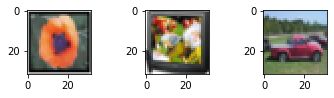

In [220]:
i=0
for img in res:
    plt.subplot(330 + 1 + i)
    i+=1
    plt.imshow(img)

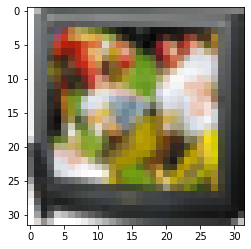

In [221]:
plt.imshow(myImage)